# Supervised Learning and Linear Methods.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section-1: Multiple Linear Regression with Machine Learning Approach.
  *   Objectives:
      *   Understand the steps included in building Machine Learning Models.
  *   Datasets:
      *   "student.csv".
  *   Learning Outcomes:
      *   Get familiar with various steps in building Machine Learning Model.
      *   Implement and build Multiple Linear Regression from Scratch with python and Numpy.
*   Section-2: Introduction to SKLEARN.
  *   Objectives:
      *   Introduction of SKLEARN, a machine learning model building library.
  *   Learning Outcomes:
      *   Ger familiar with SKLEARN library.
      
## Requirements:
Notebook Environment(Jupyter or Google Colab)

*   Author: Siman Giri


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression Algorithm.
___

The task of the Regression Algorithm is to find the $\color{purple}{maping}$ function black to map the $\color{black}{input}$ variable $\textbf{(X)}$ to the continious output variable$\textbf{(Y)}$.

Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach

1.   Analytical Approach i.e Ordinary Least Square Methods
2.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Section-1: Multiple Linear Regression With Machine Learning Approach.


##Implement Multiple Linear Regression with Gradient Descent From scratch.

Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

Implementation:

Start with Necessary Imports:


In [1]:
path2 = "/content/drive/MyDrive/aayushma/student.csv"


In [6]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the marks obtained in writing based on the marks of Math and Reading.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6. Visualize the dataset, Visualizing multi-variate dataset is not easy, In this particular case we can use special 3-D plot, Please go through the code.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("/content/drive/MyDrive/aayushma/student.csv")

print("First few rows of the dataset:")
display(df.head())

print("\nLast few rows of the dataset:")
display(df.tail())

# Converting the info into a table format
info_data = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes,
})
info_data['Non-Null Count'] = info_data['Non-Null Count'].astype(str) + ' non-null'

print("\nDataset Info:")
display(info_data)

print("\nColumns in the dataset:")
display(pd.DataFrame(df.columns, columns=["Columns"]))

if 'math' in df.columns and 'read' in df.columns and 'write' in df.columns:
    X = df[['math', 'read']].to_numpy()
    y = df['write'].to_numpy()

    if X.shape[0] == y.shape[0]:
        print("Proceed Further")
    else:
        print("Array Conversion Error: Try Again")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['math'], df['read'], df['write'], c='r', marker='o')
    ax.set_xlabel('Math Marks')
    ax.set_ylabel('Reading Marks')
    ax.set_zlabel('Writing Marks')
    plt.title('3D Scatter plot')
    plt.show()
else:
    print("Required columns are missing.")



First few rows of the dataset:


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62



Last few rows of the dataset:


,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72



Dataset Info:


,Column,Non-Null Count,Dtype
Math,Math,1000 non-null,int64
Reading,Reading,1000 non-null,int64
Writing,Writing,1000 non-null,int64



Columns in the dataset:


,Columns
0,Math
1,Reading
2,Writing


Required columns are missing.


### Visualize the Dataset.

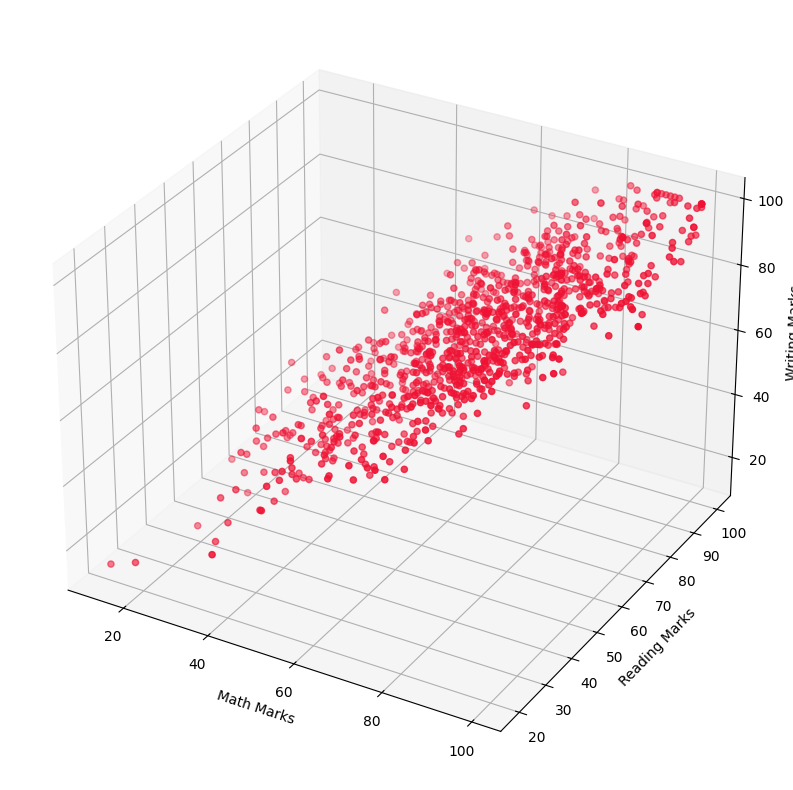

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the Math, Reading, and Writing columns
math = df['Math']
read = df['Reading']
write = df['Writing']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(math, read, write, color='#ef1234')

# Label the axes
ax.set_xlabel('Math Marks')
ax.set_ylabel('Reading Marks')
ax.set_zlabel('Writing Marks')

# Show the plot
plt.show()


### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [11]:
import numpy as np

X = np.array([1, 2, 3])
W = np.array([0.5, 0.3, 0.2])

Y = np.dot(W, X)

print("Output Y:", Y)


Output Y: 1.7000000000000002


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [12]:
#Define the cost function
import numpy as np

def cost_function(X, Y, W):
    m = len(Y)
    predictions = np.dot(X, W)
    errors = predictions - Y
    squared_errors = errors ** 2
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

X2 = np.array([[1, 2], [1, 3], [1, 4]])
Y2 = np.array([5, 6, 7])
W = np.array([0.5, 0.3])




In [13]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

10.743333333333332


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [14]:
import numpy as np

def cost_function(X, Y, W):
    m = len(Y)
    predictions = np.dot(X, W)
    errors = predictions - Y
    squared_errors = errors ** 2
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y - Y_pred
        dw = (1 / m) * np.dot(X.T, loss)
        W = W - alpha * dw
        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost

    return W, cost_history



In [15]:
X2 = np.array([[1, 2], [1, 3], [1, 4]])
Y2 = np.array([5, 6, 7])
W = np.array([0.5, 0.3])

alpha = 0.0001
iterations = 100000

new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, iterations)

print("New weights:", new_weights)
print("Final cost after gradient descent:", cost_history[-1])



New weights: [-4.48830915e+45 -1.43682686e+46]
Final cost after gradient descent: 1.2013680155029894e+93


## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [16]:
import numpy as np

def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squared.
  Input Arguments:
    Y: Array of actual(Target) Dependent Variables.
    Y_pred: Array of predicted Dependent Variables.
  Output Arguments:
    rmse: Root Mean Square.
  """
  mse = np.mean((Y_pred - Y) ** 2)
  rmse = np.sqrt(mse)
  return rmse

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Variables.
    Y_pred: Array of predicted Dependent Variables.
  Output Arguments:
    rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

Y2 = np.array([5, 6, 7])
Y_pred = np.array([5.1, 5.9, 7.1])

rmse_value = rmse(Y2, Y_pred)
r2_value = r2(Y2, Y_pred)

print("RMSE:", rmse_value)
print("R²:", r2_value)


RMSE: 0.09999999999999964
R²: 0.9850000000000001


# Let's Check Model Performance:


In [17]:
Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

4.901771140114539e+46
-3.6041040465089686e+93


# Section-2: Introduction to SKLEARN.
What is scikit-learn or sklearn?
>  

1.   Scikit-learn is probably the most useful library for machine learning in python.
2.   The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

> Please note that sklearn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.)


## Build Linear Regression with help of SKLEARN.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Practise Tasks:

For the following Datasets:

Salary.csv: Try implementing Linear Regression with OLS and explain the Result.

Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  



Intercept: 25792.200198668615
Coefficient: 9449.962321455087


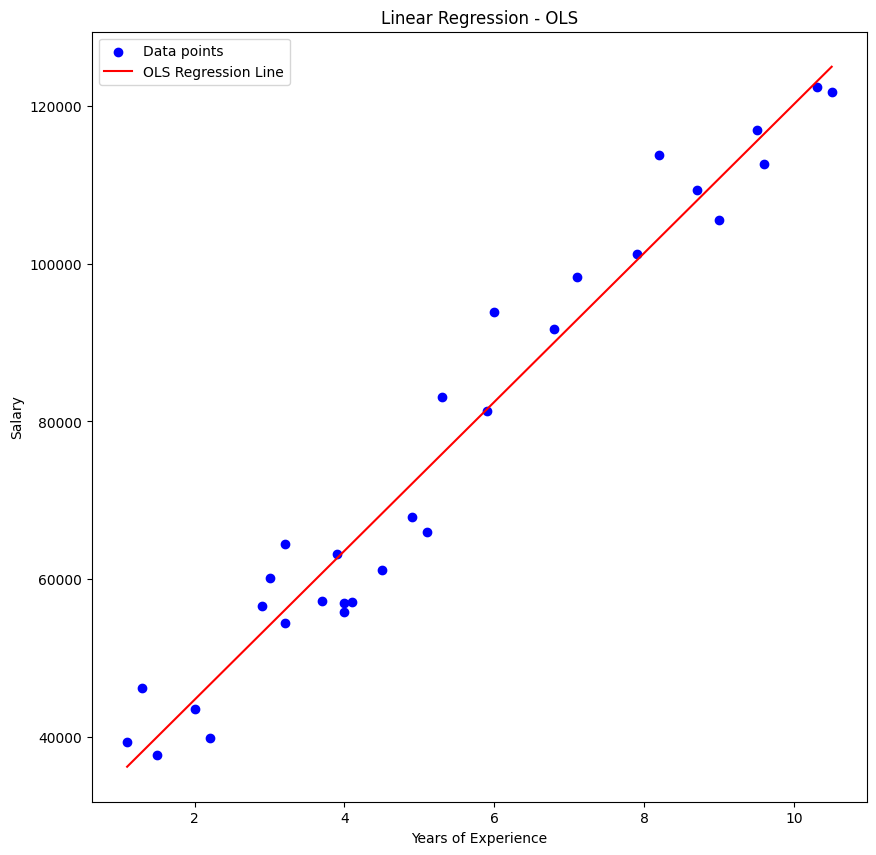

RMSE: 5592.043608760662


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/aayushma/Salary_Data (1).csv')

X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values

X = np.hstack([np.ones((X.shape[0], 1)), X])

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

print(f"Intercept: {beta[0]}")
print(f"Coefficient: {beta[1]}")

Y_pred = X.dot(beta)

plt.scatter(df['YearsExperience'], Y, color='blue', label='Data points')
plt.plot(df['YearsExperience'], Y_pred, color='red', label='OLS Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - OLS')
plt.legend()
plt.show()

rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
print(f"RMSE: {rmse}")


Intercept: -11815.452321231478
Coefficient for age: 257.2880748580632
Coefficient for sex: -131.1105796221142
Coefficient for bmi: 332.57013224229917
Coefficient for children: 479.36939354512623
Coefficient for smoker: 23820.43412267293
Coefficient for region: -353.640016558842


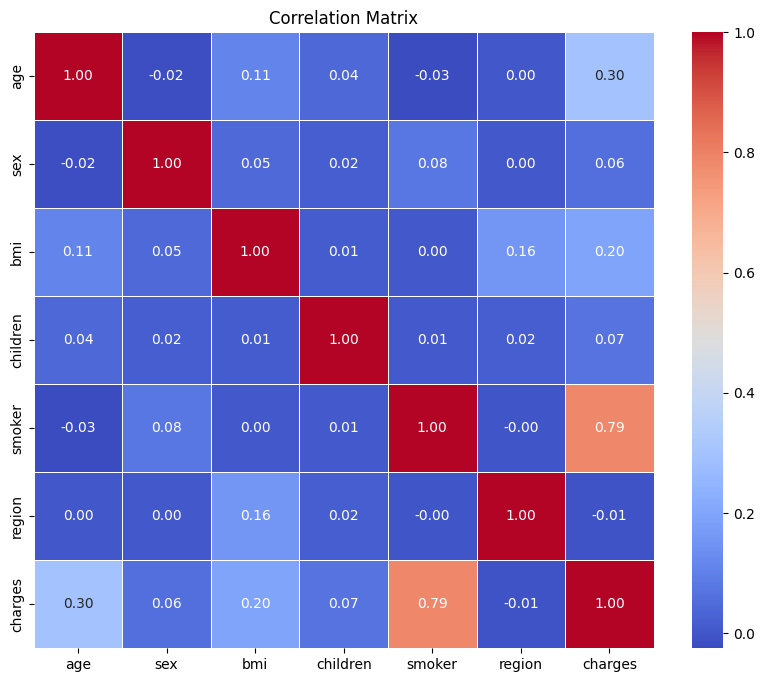

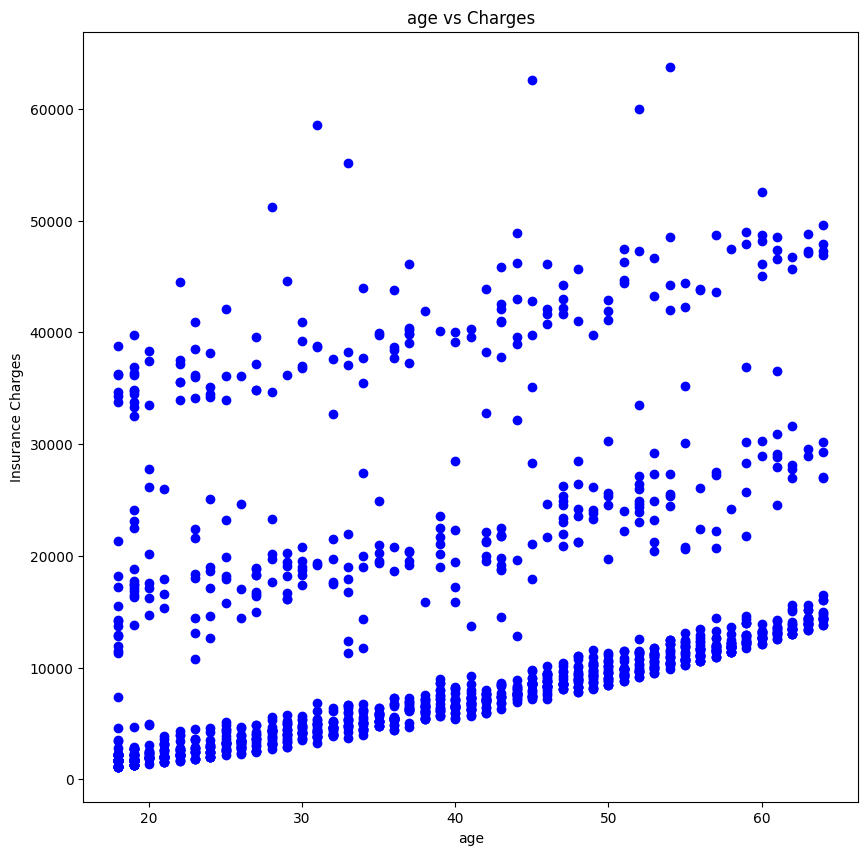

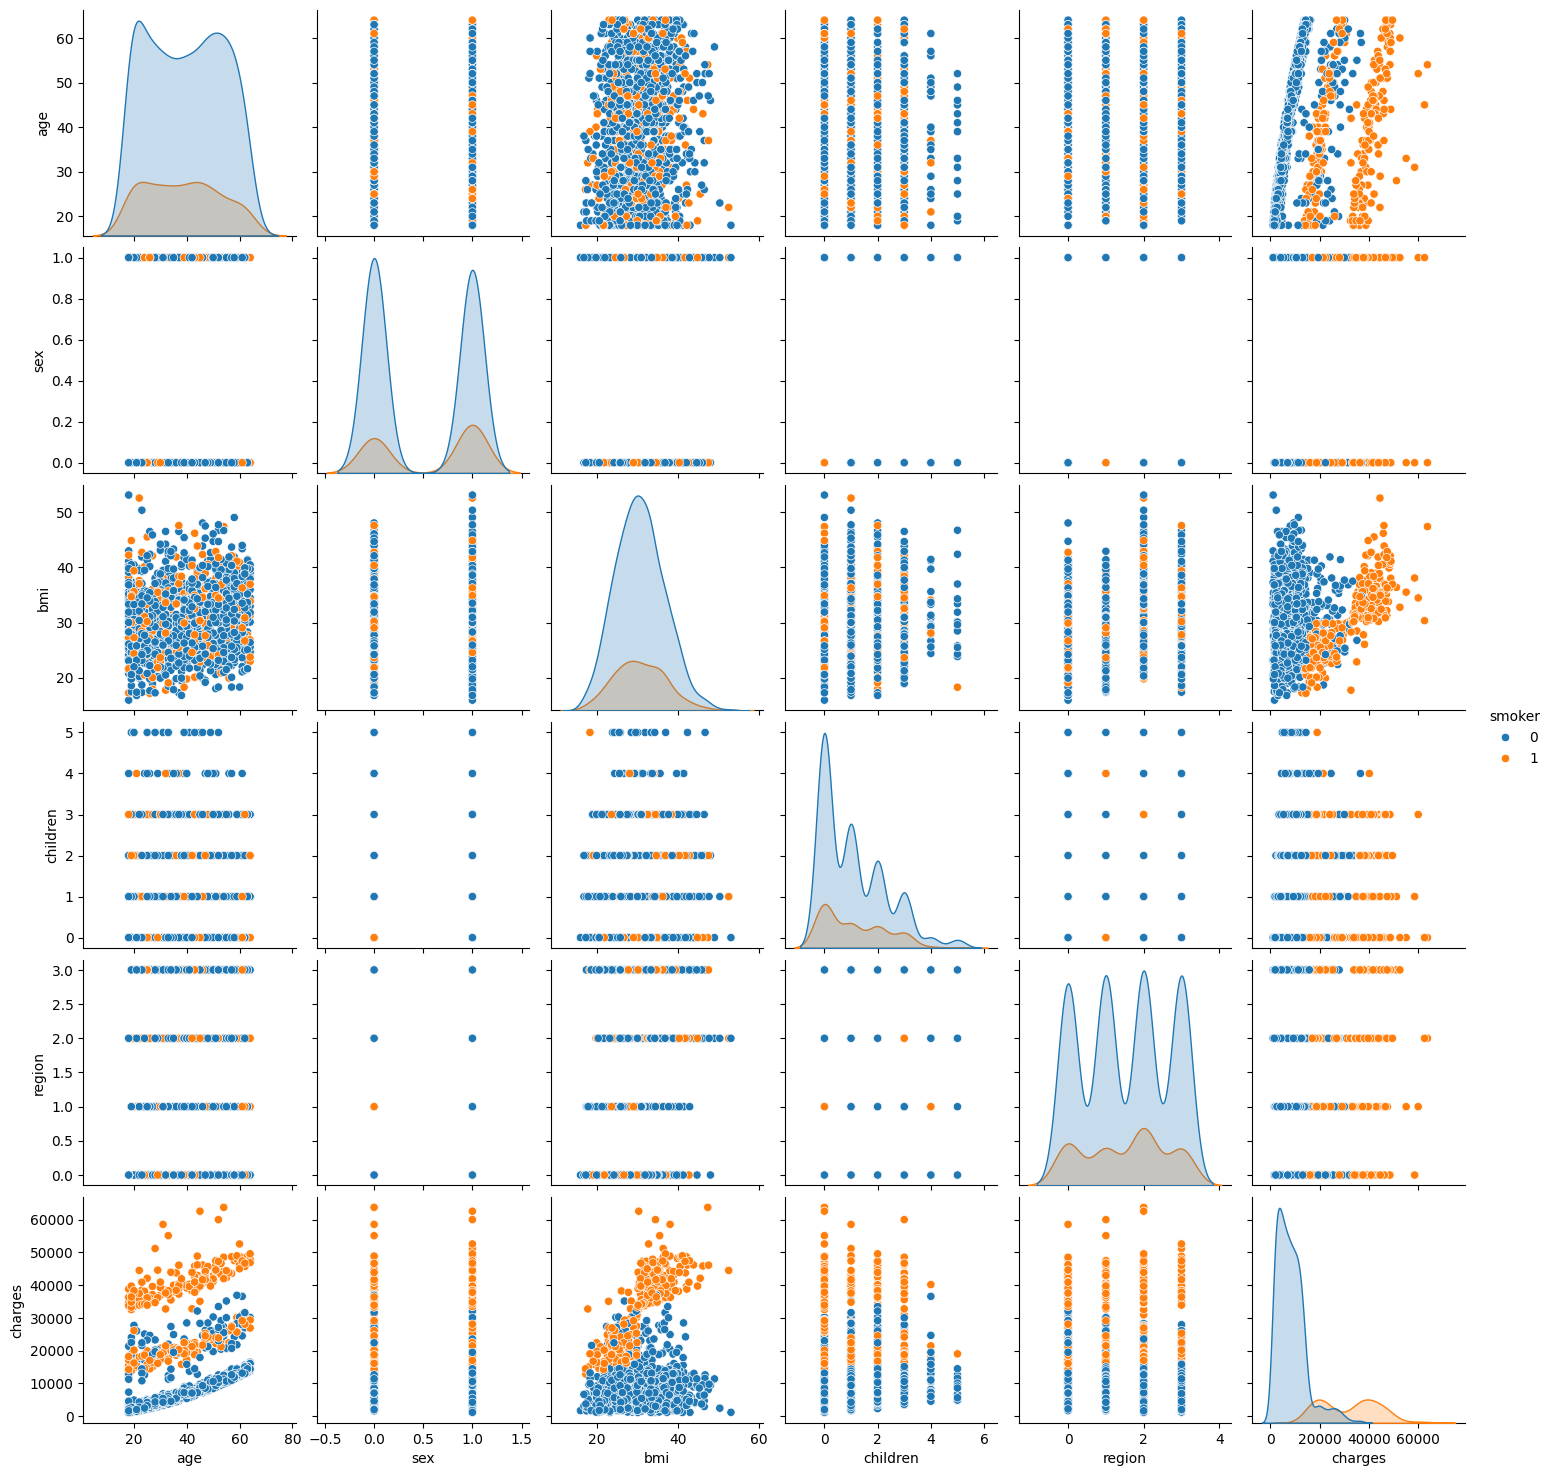

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import add_constant

df = pd.read_csv('/content/drive/MyDrive/aayushma/insurance.csv')

qualitative_cols = df.select_dtypes(include=['object']).columns
quantitative_cols = df.select_dtypes(include=['number']).columns

df_encoded = df.copy()

label_encoder = LabelEncoder()
for col in qualitative_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X = add_constant(X)

X_transpose = X.T
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

print(f"Intercept: {beta[0]}")
for i, col in enumerate(X.columns[1:]):
    print(f"Coefficient for {col}: {beta[i+1]}")

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

plt.scatter(df['age'], df['charges'], color='blue')
plt.xlabel('age')
plt.ylabel('Insurance Charges')
plt.title('age vs Charges')
plt.show()

sns.pairplot(df_encoded, hue='smoker')
plt.show()
